In [63]:
import numpy as np


## Prepare the data for the calculations

In [64]:
# Define the start and end values, as well as the increment
start_value = 0.01
end_value = 1000
increment = 0.01

In [65]:
# Create an array of data points
data_points = np.arange(start_value, end_value + increment, increment)

In [66]:
# Print the first few data points as an example
print(data_points[:10])  # This will print the first 10 data points
print(len(data_points))


[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
100000


### (a) Compute σ2 of the population D. Let’s call σ2 the true variance of the population D.

In [67]:
meanofallpoints = sum(data_points)/len(data_points)
print(meanofallpoints)

500.005


#### using formula to calculate variance of all the 1,00,000 point

In [68]:
def calculate_variance(data_points):
    # Calculate the mean (average) of the data points
    mean = sum(data_points) / len(data_points)

    # Calculate the squared differences from the mean
    squared_diff = [(x - mean) ** 2 for x in data_points]

    # Calculate the variance as the average of the squared differences
    variance = sum(squared_diff) / len(data_points)

    return variance


In [69]:

true_variance = calculate_variance(data_points)
print("Variance:", true_variance)


Variance: 83333.333325


True variance of population : 83333.333325

#### Random generator

In [70]:
import time

class SimpleRandom:
    def __init__(self, seed=None):
        if seed is None:
            seed = int(time.time() * 1000000) % 1000000
        self.state = seed

    def rand(self):
        a = 1664525
        c = 1013904223
        m = 2**32
        self.state = (a * self.state + c) % m
        return self.state
    def randrange(self, start, stop):

        range_size = stop - start
        rand_num = self.rand() % range_size
        return start + rand_num

    

In [71]:
random_generator = SimpleRandom()
print(random_generator)

#### Use sampling with replacement, to randomly sample 50 points {y1, . . . , y50} from the population D, i.e., for 1 ≤ i ≤ 50, yi ∈ D. Compute s1, s2 and s3 defined as

### Choosing random 50 points

In [72]:
# Number of iterations
num_iterations = 10  # You can change this to the desired number of iterations

In [73]:
fiftypoints= []
totalpoints = 100000

In [74]:
# Choose 50 unique indexes without repetition
while len(fiftypoints) < 50 :
    index = random_generator.rand() % totalpoints
    if index not in fiftypoints:
        fiftypoints.append(data_points[index])


In [75]:
print(fiftypoints)

[42.48, 692.59, 160.34, 592.45, 664.6, 659.51, 650.3, 796.17, 492.16, 518.27, 450.34, 831.89, 845.16, 297.99, 899.66, 208.73, 241.68, 275.15, 722.1, 57.57, 97.72000000000001, 996.63, 204.7, 191.85, 249.44, 383.39, 538.18, 197.49, 727.5600000000001, 741.67, 967.66, 572.09, 820.72, 889.07, 336.02, 270.21, 191.0, 945.59, 963.9, 511.37, 669.44, 525.31, 423.46, 371.09, 809.32, 155.59, 426.7, 558.8100000000001, 45.199999999999996, 307.15]


In [76]:
meanoffiftypoints = sum(fiftypoints) /50
print( meanoffiftypoints)

503.7494000000001


In [77]:
numerators = [ (x - meanoffiftypoints) ** 2 for x in fiftypoints]

In [78]:
print(numerators)

[212769.45937636006, 35660.77220835998, 117930.01600836008, 7867.796440359992, 25872.915520359977, 24261.364512359967, 21477.07836035996, 85509.80730435991, 134.31419236000158, 210.84782435999674, 2852.564008360013, 107676.25336835993, 116561.19779235992, 42336.93068836004, 156745.2031923599, 87036.44637636008, 68680.37041636005, 52257.68568036005, 47676.98452035997, 199076.0569843601, 164859.87366436006, 242931.2858563599, 89430.54364036006, 97281.23572036008, 64673.27092836005, 14486.385168360026, 1185.46621635999, 93794.82008836005, 50091.18467235998, 56606.21190435994, 215213.04479235987, 4670.437608359992, 100470.36126435996, 148471.96478435997, 28133.151624360038, 54540.65135236005, 97812.18720036006, 195223.11580835996, 211738.5746803599, 58.07354435999864, 27453.374928359986, 464.8594723599936, 6446.387752360019, 17598.516408360032, 93373.39158435997, 121214.96780836009, 5936.610040360016, 3031.669672359996, 210267.5522403601, 38651.32408036005]


In [79]:
numerator_after_addsquare_mean = sum(numerators)

In [80]:
print(numerator_after_addsquare_mean)

3868704.559282


In [81]:
s1square = numerator_after_addsquare_mean/51
print("s1square is " , s1square)

s1square is  75856.95214278431


In [82]:
s2square = numerator_after_addsquare_mean/50
print("s2square is " , s2square)

s2square is  77374.09118564


In [83]:
s3square = numerator_after_addsquare_mean/ 49
print("s3square is " , s3square)

s3square is  78953.15427106123


-----------------------------------------------------------------------------------------------------------------------------

##  Repeat (b) for multiple iterations and maintain the average scores, i.e., Avgs2 1 , Avgs2 2 & Avgs2 3 .

In [84]:
import matplotlib.pyplot as plt

In [85]:
# Initialize average scores
avg_s1_squared = 0
avg_s2_squared = 0
avg_s3_squared = 0

In [86]:
# Number of iterations
num_iterations = 100  # You can change this to the desired number of iterations

In [87]:
list_of_average_s1_2 , list_of_average_s2_2 , list_of_average_s3_2 = [],[],[]

In [88]:
iterations = []

In [89]:
# Perform multiple iterations
# plotting every 20 , 5 times
iteration_count = 0
for iteration in range(num_iterations):
    avg_s1_squared = 0 
    avg_s2_squared = 0 
    avg_s3_squared = 0
    for t in range (100):
        # Perform sampling with replacement to randomly select 50 points from the population
        fiftypoints= []
        totalpoints = 100000
        sample_size = 50
        # Choose 50 unique indexes without repetition
        while len(fiftypoints) < 50 :
            index = random_generator.rand() % totalpoints
            # if index not in fiftyindex:
            fiftypoints.append(data_points[index])

        meanoffiftypoints = sum(fiftypoints) /50
        numerators = [ (x - meanoffiftypoints) ** 2 for x in fiftypoints]
        numerator_after_addsquare_mean = sum(numerators)
        
        # Calculate s^2_1, s^2_2, and s^2_3 for the current iteration
        s1_squared = numerator_after_addsquare_mean/51 # Sample variance with population correction
        s2_squared = numerator_after_addsquare_mean/50  # Sample variance with Bessel's correction
        s3_squared = numerator_after_addsquare_mean/49  # Sample variance with another degree of freedom
        avg_s1_squared += (s1_squared)
        avg_s2_squared += (s2_squared)
        avg_s3_squared += (s3_squared)
    
    iteration_count += 1
    iterations.append(iteration_count)
        
    avg_s1_squared = avg_s1_squared / 100
    avg_s2_squared = avg_s2_squared / 100
    avg_s3_squared = avg_s3_squared / 100
    list_of_average_s1_2.append(avg_s1_squared)
    list_of_average_s2_2.append(avg_s2_squared)
    list_of_average_s3_2.append(avg_s3_squared)
    
    



In [90]:
print(iterations)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [91]:
# Print the average scores after multiple iterations
print("Average s^2_1:", list_of_average_s1_2)
print("Average s^2_2:", list_of_average_s2_2)
print("Average s^2_3:", list_of_average_s3_2)


Average s^2_1: [80964.38303966272, 80515.06862349958, 81959.61172112469, 80926.05603655685, 81427.04743636232, 79087.37197712474, 80979.57261699923, 81444.56285491608, 79066.22984820862, 78859.92999450512, 80037.85779432316, 79965.68790506828, 80306.14375816942, 81018.16303710274, 80876.59888636392, 79739.1732971561, 79409.12107970667, 79470.0277839953, 80750.96339853964, 79138.85974722666, 80676.66672691605, 79646.40495634981, 79181.18897923922, 80340.01619582898, 80542.54692330821, 80933.61493053648, 78630.41555899137, 79250.54030615998, 81156.7483206667, 78504.98134321098, 80164.56548807687, 79427.75654905883, 81997.12955446122, 80197.8570025804, 81471.64325982273, 80793.94804446276, 80956.34150449099, 78292.33408553568, 78975.53525979765, 79090.12372654593, 79620.03089218665, 77999.64247244701, 80157.98538893962, 80820.49229737568, 80507.94253546822, 79067.46927092862, 79847.27608620077, 79917.14030706353, 79886.66675570355, 79920.50391724073, 80251.45957086272, 78164.33466956703, 

### (d) Use three different scatter plots to visualize the change in Avgs2 i , for 1 ≤ i ≤ 3 over increasing number of iterations and compare it with σ2 the true variance of D.

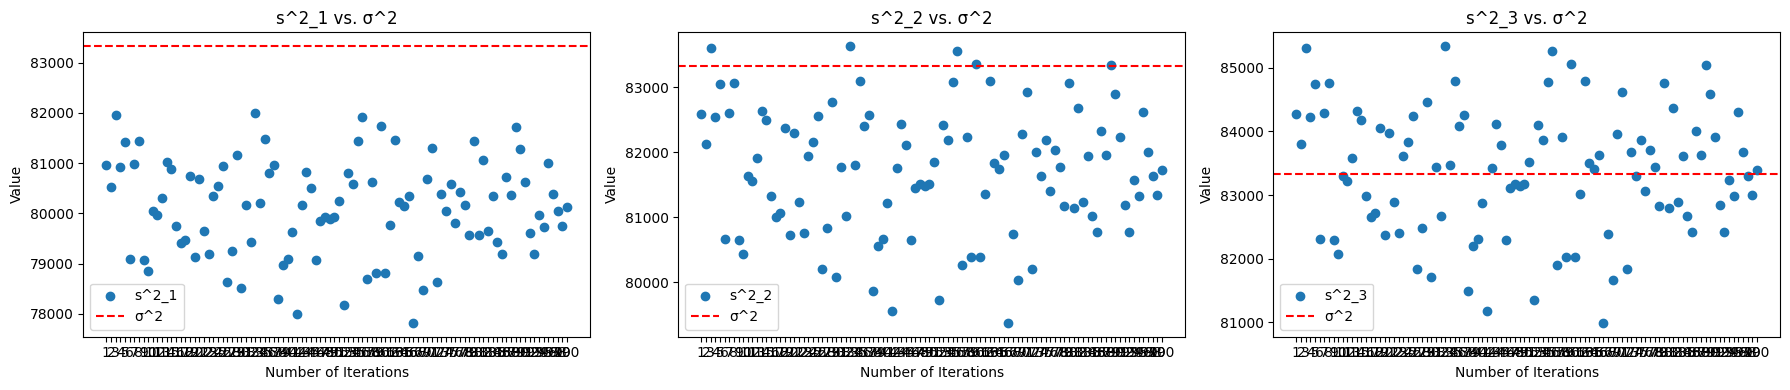

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 4))

# Scatter plot for s^2_1
plt.subplot(131)
plt.scatter(iterations, list_of_average_s1_2, label='s^2_1', marker='o')
plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')

# plt.plot(iterations, true_variance, label='σ^2', linestyle='--', color='red')
plt.xlabel('Number of Iterations')
plt.ylabel('Value')
plt.xticks(iterations)
plt.title('s^2_1 vs. σ^2')
plt.legend()

plt.subplot(132)
plt.scatter(iterations, list_of_average_s2_2, label='s^2_2', marker='o')
plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
plt.xlabel('Number of Iterations')
plt.ylabel('Value')
plt.xticks(iterations)

plt.title('s^2_2 vs. σ^2')
plt.legend()

plt.subplot(133)
plt.scatter(iterations, list_of_average_s3_2, label='s^2_3', marker='o')
plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
plt.xlabel('Number of Iterations')
plt.ylabel('Value')
plt.xticks(iterations)

plt.title('s^2_3 vs. σ^2')
plt.legend()

plt.tight_layout()
plt.show()


## part e Repeat (b), (c) & (d) multiple times and notice among Avgs2 1, Avgs2 2 and Avgs2 3 which score approaches to the true variance much quickly or frequently. Argue its reason.

# Repeating the same experiment 10 times and writing observation

Average s^2_1: [80552.91501915763, 80884.06499768628, 79347.85078991216, 81032.35916161412, 80557.05610093336, 79748.87633258822, 78616.53831686435, 79739.8768411498, 78403.60349007217, 80070.80228019615, 80364.90700440003, 78631.47600448158, 78741.29821822904, 79796.39877758903, 79582.37016529727, 78434.39652579295, 79154.86149939607, 79498.0487246196, 81008.19559485652, 81441.64142176784, 80273.57616106821, 80638.11840714196, 81812.03690334274, 79853.45172421173, 80620.8676970306, 78811.74327405334, 80488.35988308239, 79995.7058474808, 79031.24615975059, 79629.96154567687, 80876.41285711213, 80312.75463335057, 78487.90144797022, 79494.41173046114, 81343.66228310745, 80337.93838917176, 78432.66371244082, 81306.92311623685, 80297.06721216155, 79564.56849105723, 80374.02607183218, 80916.06382482983, 79952.56014144156, 78868.53020071056, 79903.17686632313, 80905.90305595139, 80686.84729583845, 79097.7182912392, 79929.80094475453, 80713.52082548864]
Average s^2_2: [82163.97331954079, 8250

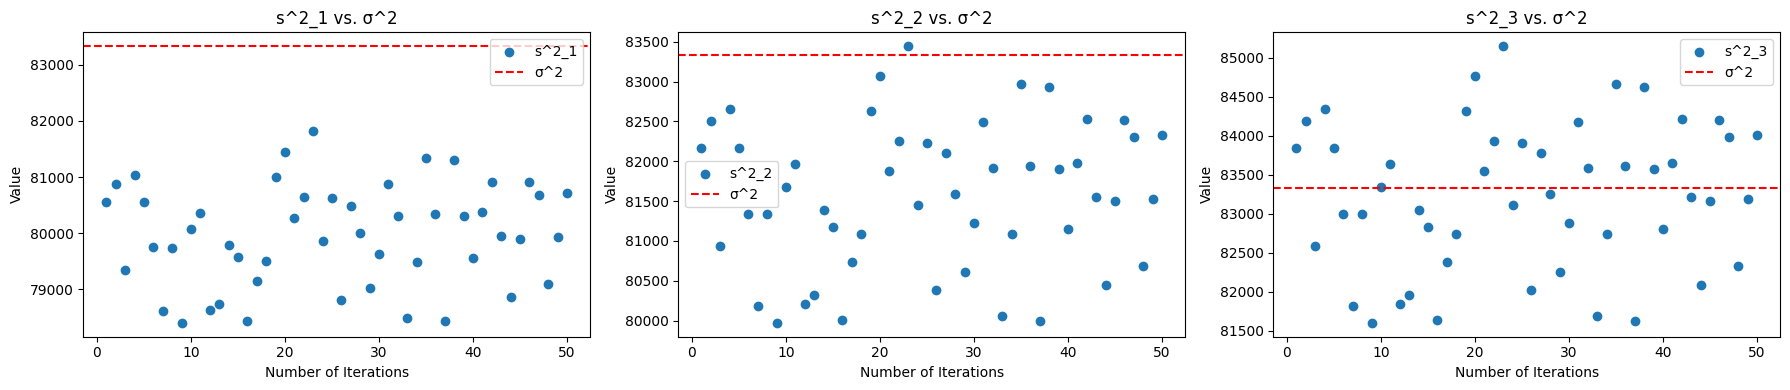

Average s^2_1: [80136.31446183061, 81062.56001349175, 79576.86166672471, 79472.84205940863, 78853.76444670904, 81191.60908362195, 78803.60743576, 78958.5138089804, 78532.91536716706, 79730.50865715604, 79136.52664113099, 79045.05209152159, 77844.2857910604, 80715.74037565649, 80987.11265984156, 80974.06888780704, 81025.31598636077, 79637.49788670904, 80861.49088618824, 81627.87574258352, 79218.49389677333, 80314.74196514039, 77958.63091542746, 78820.99956185256, 77641.16596832788, 80620.49429558119, 81502.7570010996, 78944.9443442086, 82081.82276167689, 80262.93391233413, 79161.04786496161, 79021.08473874979, 81204.49898745882, 80533.87513626511, 80617.86188404863, 78320.89749595762, 79727.4970002463, 79505.54671717803, 81669.91916291919, 81602.24744607533, 77845.26062977413, 79518.91117865566, 81632.45732418666, 78611.70355555294, 80481.21892451296, 79446.99232463216, 78968.30666427138, 79863.77238702586, 81304.37945651606, 80448.75364160156]
Average s^2_2: [81739.04075106718, 82683.8

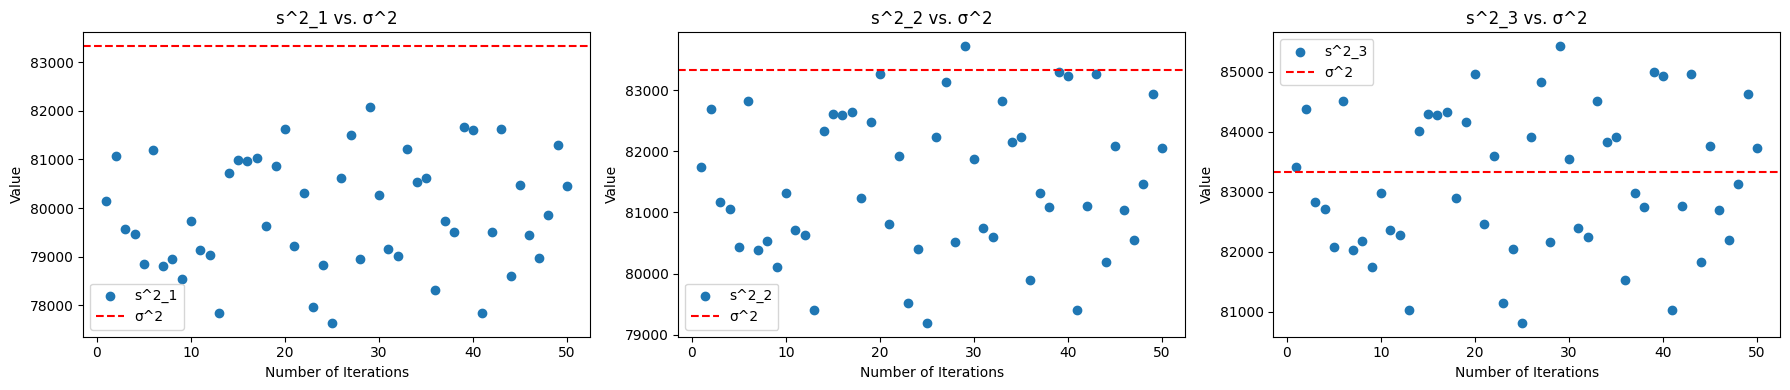

Average s^2_1: [79323.44312622584, 78878.10249498511, 82596.9835273427, 80011.85491791216, 79609.27966738981, 79889.8282474808, 81436.01713319059, 79981.52370127215, 81150.60654623526, 79524.96564732393, 81248.88139955608, 79599.7944413757, 80625.15377580079, 79980.70581565645, 81852.59081754509, 80652.96111800623, 79084.53308643296, 79657.13757494117, 80815.82467116075, 79508.21079508236, 78986.24731953099, 82165.50525255685, 79976.46424303844, 80517.59485865566, 81180.4180726604, 81750.08522417097, 80074.63690582747, 79874.58131613019, 82126.51235392159, 79087.25028421177, 81793.14583069019, 79953.75333585723, 78861.66664509647, 78935.0959515749, 80349.50307640628, 81775.23328061646, 80340.85498813647, 79538.63487075294, 82033.75845266983, 79643.74414437804, 79974.98360133175, 77705.20330934122, 80665.04748040941, 81640.50928018981, 81394.54090442194, 80484.88959389018, 78824.33023027609, 79787.31293709957, 77910.46698818663, 83045.57349874353]
Average s^2_2: [80909.91198875039, 8045

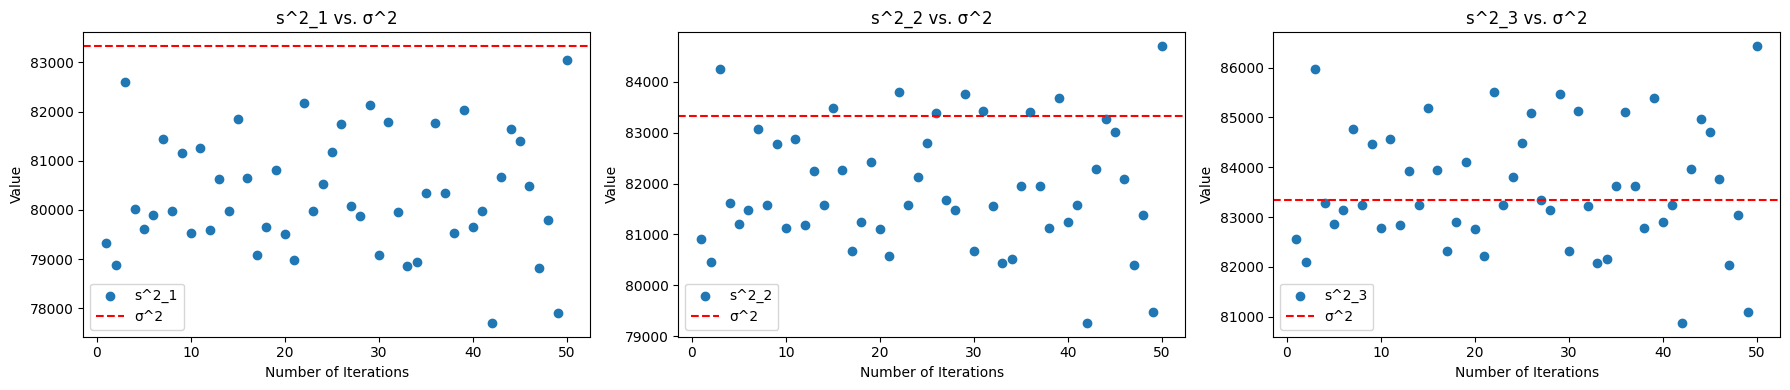

Average s^2_1: [78751.96228473884, 80000.01492483918, 81329.69093874353, 79629.0968208706, 80164.29723985723, 82296.16472705411, 80995.81442210039, 78694.56973509173, 78554.05190755296, 79617.76362103372, 80198.9430211906, 82487.31560765648, 79373.7427651404, 81859.39883581648, 79930.4753565255, 80825.1516582039, 81062.95618882668, 80260.54998529408, 80379.9230533412, 78289.71385006592, 79834.52696680315, 80357.87883654429, 79431.66954956707, 79098.62058984318, 80025.84907215217, 80655.57644071059, 80040.56012613176, 81468.18644032157, 80239.83524900553, 80201.0506999608, 80727.60504534743, 79097.09419832629, 80675.72886679998, 81872.4106307153, 80008.12814560783, 79356.47796365964, 80145.88435956863, 80763.70222568317, 80817.3610795812, 80844.46023919841, 78987.0715550008, 79932.29217319061, 80481.20329049251, 79309.45488714197, 80282.1413497114, 80136.20344411767, 80566.28168243608, 79668.34101864314, 78811.7667466933, 80191.93822334903]
Average s^2_2: [80327.0015304336, 81600.015223

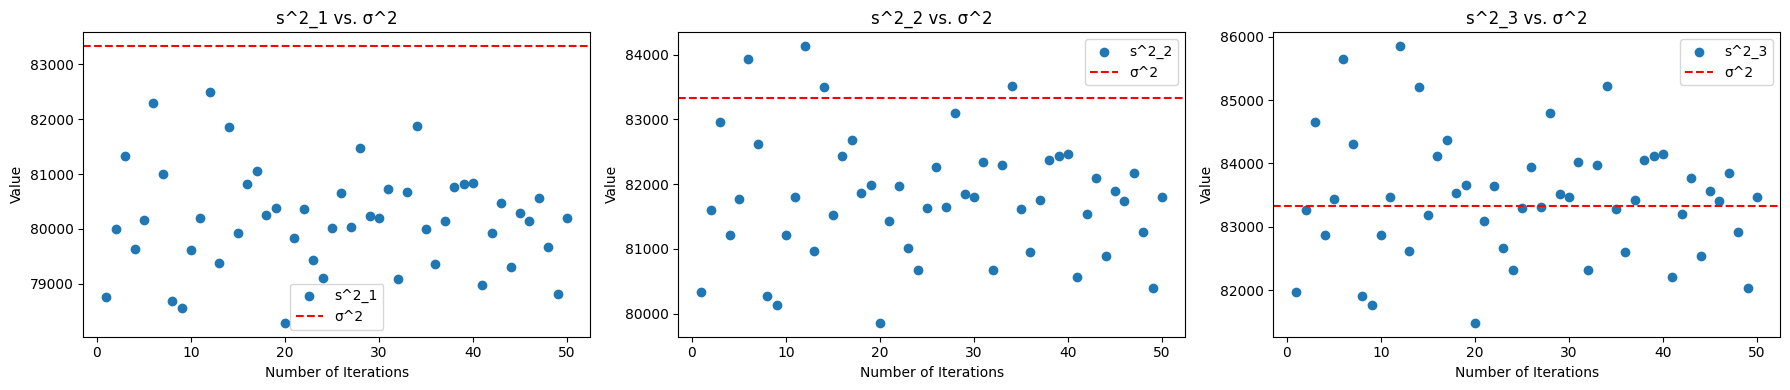

Average s^2_1: [80090.10196227924, 80884.84303148076, 80641.8001708314, 77782.65553098191, 80758.71328761884, 79333.87313364237, 80884.88817883763, 79820.71873449569, 78823.11148502746, 79369.32542528157, 81254.77998119059, 78902.31133647215, 79315.6557799796, 81202.31463272318, 78363.23515230276, 80932.24719175688, 80321.33194113409, 79086.29467132397, 80585.6571993992, 80943.05857098196, 79055.94760441885, 80777.23150154197, 80448.84113394354, 80051.86804980862, 80279.31142780393, 81930.49544798276, 80102.9232936298, 79637.15395670745, 76536.54003397177, 79431.43391173179, 79277.71865724394, 79101.51226690665, 81080.5387677757, 80749.14778770981, 78914.60261876864, 80306.0161897553, 80261.96587272942, 80849.57569376782, 80045.00545891293, 80904.45618646746, 81115.65848376624, 81162.95838302273, 79710.78031047688, 81273.68218939137, 80537.94788350906, 80474.74068556707, 82779.84148717334, 80023.26309723762, 81776.0235984706, 80106.10138547608]
Average s^2_2: [81691.90400152477, 82502.

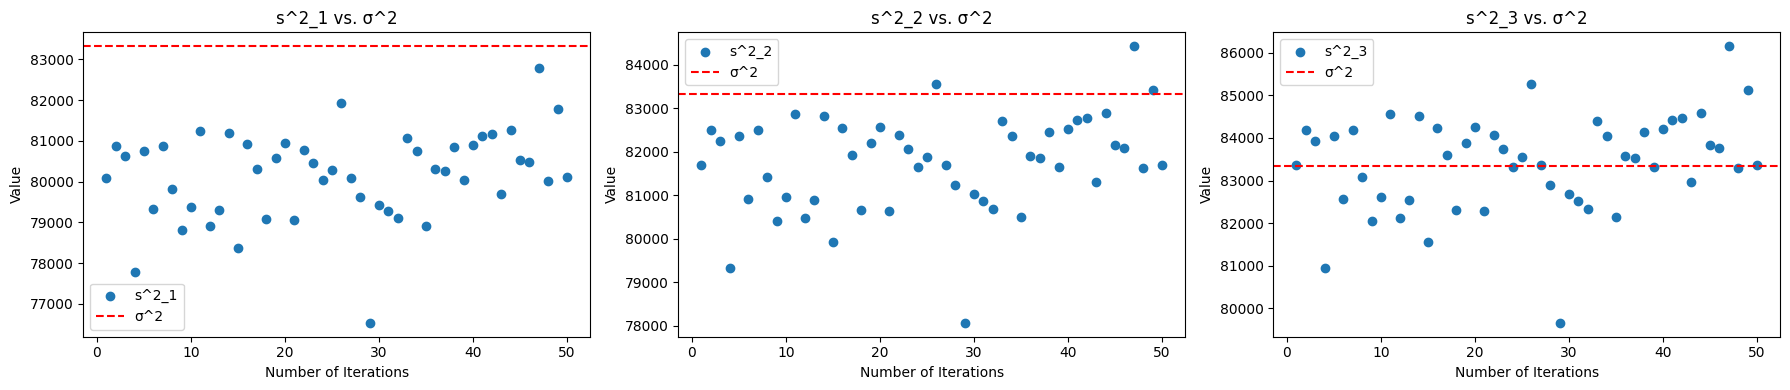

Average s^2_1: [80425.49593832312, 81381.06932453802, 80008.20671404079, 78740.7959735357, 79369.1897746714, 80149.4623005255, 80416.39496838434, 80219.73912815841, 79918.64051841413, 80581.36641271372, 79133.10639218352, 81199.20571900393, 79873.23555587922, 80187.91148663376, 80356.01070229494, 80905.02577810979, 80955.95747336943, 80385.24880350273, 79609.41588428707, 79728.92382053807, 80546.0294367012, 80667.84403299296, 82653.25262465414, 81505.04413275764, 82067.41672956389, 80719.54562651762, 80798.9715512361, 77493.76443985726, 80242.20884044706, 80378.71804452552, 81285.75749758899, 82186.65437386197, 80233.57657588864, 79416.4572493192, 81860.41057278903, 79865.7271695702, 80904.03989578194, 80009.62474996861, 79665.24605893176, 81796.10276488938, 79281.14206636074, 81886.45268488943, 79568.25081485961, 81413.74943813178, 79492.30695548392, 81412.59585409414, 79478.01851373333, 78764.01465759527, 81034.67840307608, 79704.9149951639]
Average s^2_2: [82034.0058570896, 83008.69

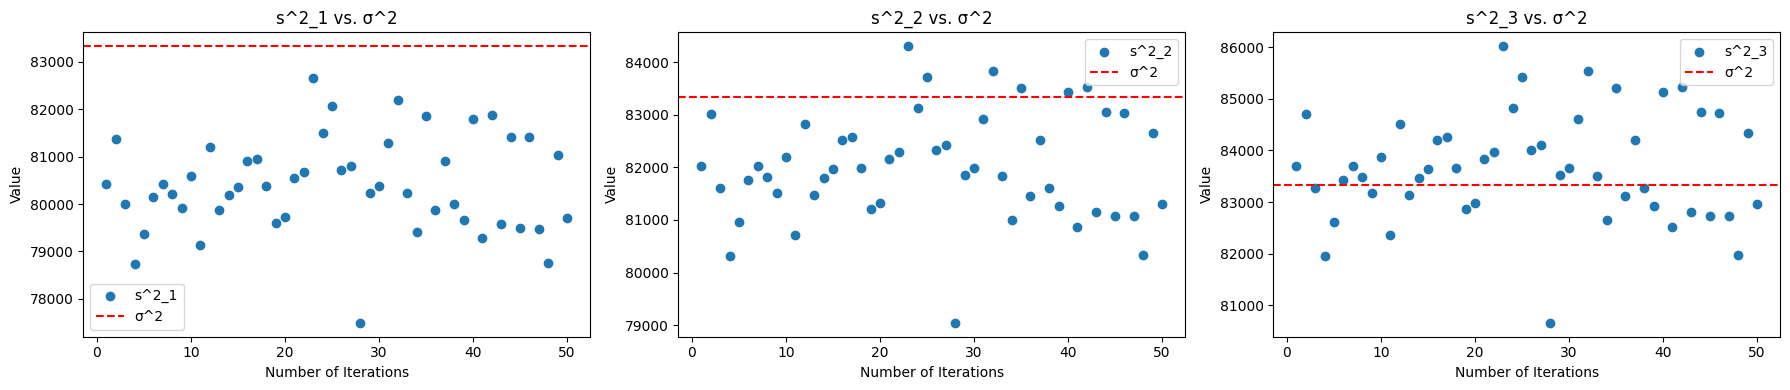

Average s^2_1: [79355.02187958121, 80499.87350486746, 80592.78788388551, 80893.23273689256, 79265.78627336939, 80753.99674246434, 81678.2497792141, 79757.21227423527, 79562.93951921101, 79088.1820536863, 81141.92778786039, 79923.28281287687, 79477.54078992468, 79458.85612771296, 81879.3165303608, 79919.9619641616, 78512.05996377255, 76459.66884062276, 79399.07363643133, 81886.90785163449, 81937.85152485805, 80563.82110151683, 79995.82198825567, 80987.02233556233, 80066.66917121413, 79327.39031089094, 80373.3997306369, 79337.95616126904, 80872.3896820596, 81103.26608829648, 78197.83850243923, 79192.05466110902, 81099.16996441255, 81553.65136485804, 78508.62525883135, 77800.86438087685, 80070.03343138038, 81793.12609073102, 80365.69795065885, 81059.3261108596, 79885.3047695451, 81490.63152290038, 78031.74341201728, 78752.11740450042, 79661.37943061492, 79808.23931476235, 81828.82458876398, 78559.59686047529, 81287.09496886119, 81875.83463465571]
Average s^2_2: [80942.12231717279, 82109.8

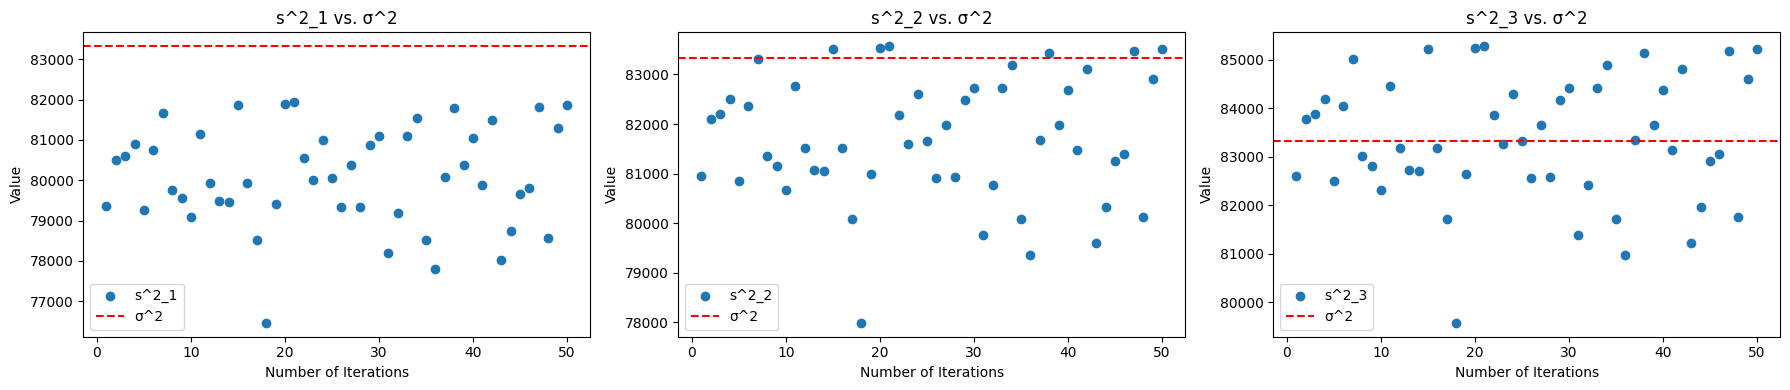

Average s^2_1: [79950.56828091136, 78642.11459869015, 79878.37890767219, 78355.49532402356, 78806.01046135374, 81201.85908584311, 80209.18760173331, 80953.36592262432, 80849.21479578508, 79811.91745095684, 78964.43772600629, 81232.23161365492, 80747.59756808943, 79265.17462014899, 79157.26754797334, 79465.17998184315, 78202.25371493804, 79373.79511954983, 80874.2793528863, 78670.27941136467, 80173.5876215608, 78758.3170677349, 79920.83792641408, 82049.45196083607, 80046.13570526271, 78762.05757446433, 80308.68680163295, 80344.8026958447, 80124.19673779607, 80833.36304696627, 80227.60006860709, 79918.07833357964, 79602.6457332345, 79326.48116647055, 80860.39211817569, 80576.21888606274, 78688.92566381337, 79310.97171761098, 79851.37911681413, 82188.60471666353, 78500.27537798435, 80373.73621851766, 82037.67612989648, 78665.19020987136, 81050.78183151841, 81889.03250867609, 80405.76653233102, 80419.91131320628, 81189.24674897725, 79476.3376719953]
Average s^2_2: [81549.57964652957, 80214

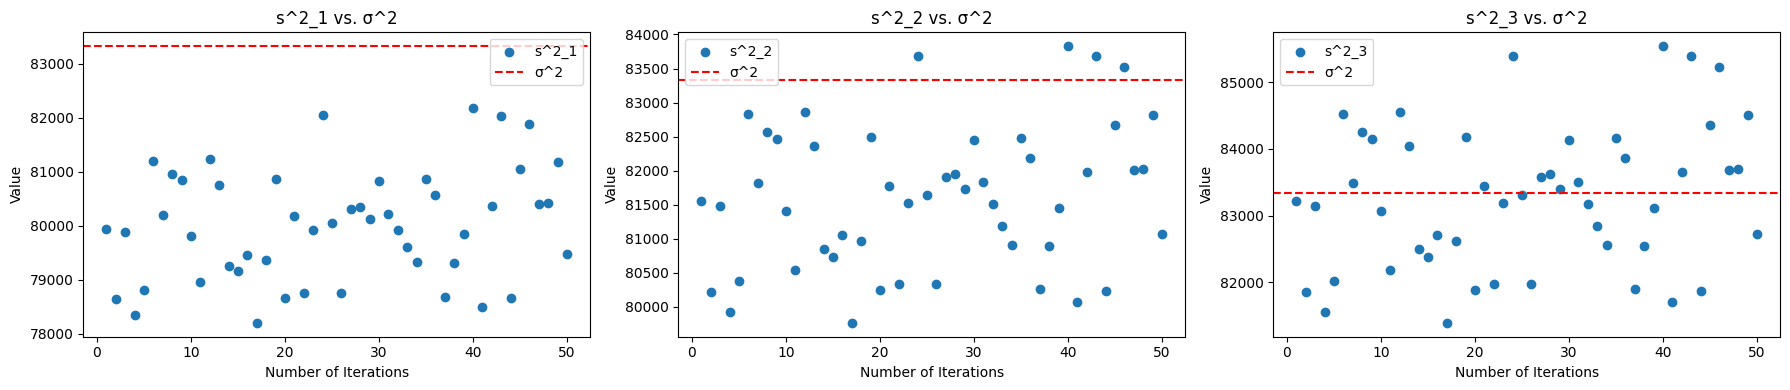

Average s^2_1: [79115.34240739295, 78161.57645253178, 82488.5285516439, 80191.0323887577, 80257.99171741023, 79756.75232997804, 80952.61388161413, 80578.26354870116, 79389.33791120471, 80170.06357608314, 79840.2653979498, 79642.00012221646, 79330.25580640788, 80391.74841162194, 77725.44058969256, 80026.97603650666, 79837.01975606117, 80921.25833144627, 81539.31517095059, 80383.91961390589, 80129.45138330512, 82222.65016840943, 80769.01356748705, 78833.8039603341, 81252.98764387297, 80878.13235944315, 79951.3632115843, 78963.45319824468, 82351.3127543357, 79115.24573037334, 80298.95772979608, 80850.94313393098, 79875.68415517017, 79841.7533633145, 80652.16559353884, 79438.33979293022, 80523.59835021963, 81506.83308299453, 80364.00142109019, 79754.90431875923, 81402.87471112944, 80858.49024031525, 81851.42210493649, 80102.68913093177, 81866.70015005021, 81294.47107540233, 81225.9302672204, 78601.87172870433, 78841.67213632159, 79205.73422370038]
Average s^2_2: [80697.64925554077, 79724.8

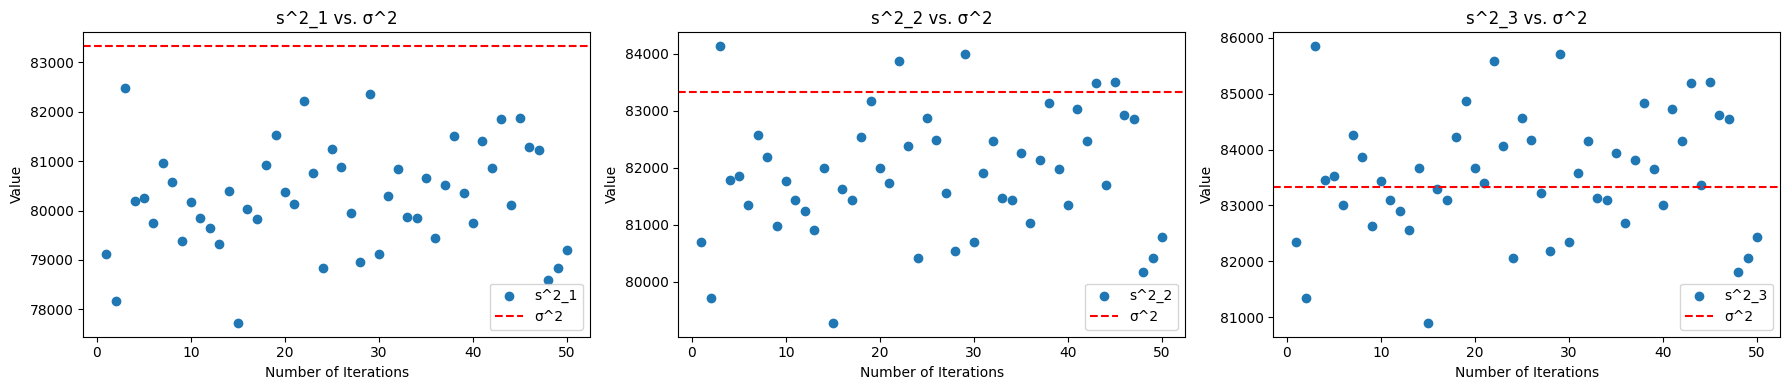

Average s^2_1: [81165.21937996706, 78870.13685389963, 79224.44800641415, 77794.53471795606, 78777.90089433253, 81192.53477791532, 81151.58129401879, 79658.38781991061, 79280.48831527059, 79819.43539055841, 80675.1343657804, 80152.12494934746, 79976.6566682494, 80984.96860650824, 80649.47131353253, 79355.7506308408, 81504.6417397851, 83622.41664026509, 80434.37863367687, 79051.43983993882, 78124.27205357334, 78099.41166598434, 80319.21315183843, 81047.49133235608, 80530.55251592943, 81382.95859608, 81508.11935471844, 80040.90462390114, 78376.34431896001, 79400.33544344001, 79291.4605378902, 80551.90106163608, 81450.34430979924, 79945.0608041553, 80322.69709880628, 79945.41472483295, 81208.13427138665, 80320.84583209566, 80639.6606296486, 80183.01062381334, 80429.72835053335, 80294.80014349961, 79453.90281897568, 80097.4424527953, 79566.00568449411, 80718.40821663527, 82038.06407460549, 82015.84951523293, 81808.03251008154, 81013.90131545257]
Average s^2_2: [82788.52376756638, 80447.5395

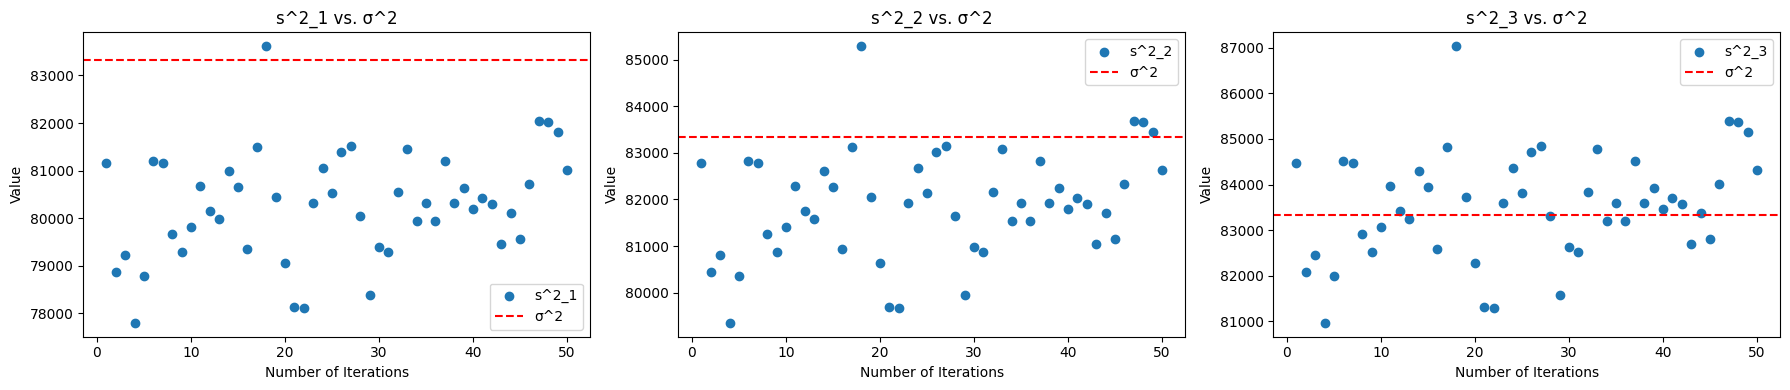

In [93]:
for x in range(10): 
   # Initialize average scores
    avg_s1_squared = 0
    avg_s2_squared = 0
    avg_s3_squared = 0
    # Number of iterations
    num_iterations = 10  # You can change this to the desired number of iterations
    list_of_average_s1_2 , list_of_average_s2_2 , list_of_average_s3_2 = [],[],[]
    iterations = []
    # Perform multiple iterations
    # plotting every 20 , 5 times
    iteration_count = 0
    for iteration in range(50):
        avg_s1_squared = 0 
        avg_s2_squared = 0 
        avg_s3_squared = 0
        for t in range (100):
            # Perform sampling with replacement to randomly select 50 points from the population
            fiftypoints= []
            totalpoints = 100000
            sample_size = 50
            # Choose 50 unique indexes without repetition
            while len(fiftypoints) < 50 :
                index = random_generator.rand() % totalpoints
                # if index not in fiftyindex:
                fiftypoints.append(data_points[index])

            meanoffiftypoints = sum(fiftypoints) /50
            numerators = [ (x - meanoffiftypoints) ** 2 for x in fiftypoints]
            numerator_after_addsquare_mean = sum(numerators)
            
            # Calculate s^2_1, s^2_2, and s^2_3 for the current iteration
            s1_squared = numerator_after_addsquare_mean/51 # Sample variance with population correction
            s2_squared = numerator_after_addsquare_mean/50  # Sample variance with Bessel's correction
            s3_squared = numerator_after_addsquare_mean/49  # Sample variance with another degree of freedom
            avg_s1_squared += (s1_squared)
            avg_s2_squared += (s2_squared)
            avg_s3_squared += (s3_squared)
        iteration_count += 1
        iterations.append(iteration_count)
            
        avg_s1_squared = avg_s1_squared / 100
        avg_s2_squared = avg_s2_squared / 100
        avg_s3_squared = avg_s3_squared / 100
        list_of_average_s1_2.append(avg_s1_squared)
        list_of_average_s2_2.append(avg_s2_squared)
        list_of_average_s3_2.append(avg_s3_squared)
        
        
    # Print the average scores after multiple iterations
    print("Average s^2_1:", list_of_average_s1_2)
    print("Average s^2_2:", list_of_average_s2_2)
    print("Average s^2_3:", list_of_average_s3_2)

    # import matplotlib.pyplot as plt

    plt.figure(figsize=(18, 4))

    # Scatter plot for s^2_1
    plt.subplot(131)
    plt.scatter(iterations, list_of_average_s1_2, label='s^2_1', marker='o')
    plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')

    # plt.plot(iterations, true_variance, label='σ^2', linestyle='--', color='red')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Value')
    plt.title('s^2_1 vs. σ^2')
    plt.legend()

    plt.subplot(132)
    plt.scatter(iterations, list_of_average_s2_2, label='s^2_2', marker='o')
    plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Value')
    plt.title('s^2_2 vs. σ^2')
    plt.legend()

    plt.subplot(133)
    plt.scatter(iterations, list_of_average_s3_2, label='s^2_3', marker='o')
    plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Value')
    plt.title('s^2_3 vs. σ^2')
    plt.legend()

    plt.tight_layout()
    plt.show()


## From the graphs, it's visible that s^2_3 , is reaching the true variance earliest.
## Degrees of freedom refer to the number of independent pieces of information available in a sample to estimate a parameter. In the context of variance estimates:


#### Since there is one less degree of freedom then n, because we have the sample variance is already defined
### However,  using (n - 1) degrees of freedom (as in s^2_3) should be done when estimating the population variance from a sample because it provides a less biased estimate of the true population variance. This correction accounts for the fact that you've already used one degree of freedom to calculate the sample mean.

#### (as in s^2_2) , assume n degrees of freedom , but since we have defined , sample variance it doesn't take account of it  , and hence, the value is although close but not as close as 3rd one and doesn't reach it as fast as 3rd

#### (as in s^2_1) , assume n+1 degrees of freedom , but since we have defined , sample variance it doesn't take account of it , and even after that it takes one more degree of freedom , and hence, the value is not even as close as second and reaches true_variance slower than 2nd one also , (even slower, and farther than 3rd)
 